# APS1070
#### Project 1 --- Basic Principles and Models 
**Deadline: Oct 6th, 9PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Anbumanivel Mohan Suganthi

Student ID: 1008696653

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [85]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? 30
* How many observations have a 'mean area' of greater than 700? 171
* How many participants tested `Malignant`? 212
* How many participants tested `Benign`? 357

In [86]:
import pandas as pd

#creating dataframe
df=pd.DataFrame(data = dataset.data, columns= dataset.feature_names)

#adding target to dataframe
df['target']=pd.DataFrame(dataset.target)

#question 1.1
print("1. The total number of features: ", len(df.columns)-1) #since the feature does not include target, subtracted 1 from the total number of columns in dataframe

#question 1.2
print("2. The total number of observations having mean area greater than 700: ", df[df['mean area']>700]['mean area'].count())

#question 1.3
print("3. The total number of participants tested Malignant: ", df.target.value_counts()[0]) #0 represents Malignant

#question 1.3
print("3. The total number of participants tested Benign: ", df.target.value_counts()[1]) #1 represents Benign
df.head()

1. The total number of features:  30
2. The total number of observations having mean area greater than 700:  171
3. The total number of participants tested Malignant:  212
3. The total number of participants tested Benign:  357


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

**Only Split the dataset once within you notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [87]:
from sklearn.model_selection import train_test_split

#feature data
X=df.drop(columns='target')

#target data
Y=df['target']
columns=df.columns.values

#splitting the data
x_train,x_test,y_train,y_test=train_test_split(X.values,Y.values,test_size=0.3,random_state=0)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(398, 30) (398,)
(171, 30) (171,)


### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? **[0.6]**




Answer: The scale of vales in the graph differs from before standardizing the data and after standardizing the data. Standardization is centering the data to a mean of 0 and standard deviation of 1.Therefore, the shape remains the same. Standardizing the data helps in reducing challenges related to poor data quality and makes the data look normally distributed.

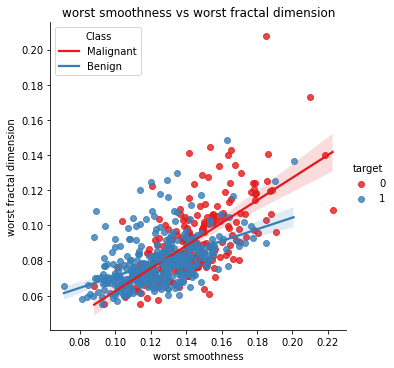

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

#plot between worst smoothness and worst fractional dimension
plot_1=sns.lmplot(x="worst smoothness", y="worst fractal dimension", data=df, hue="target", palette="Set1")
plt.legend(title='Class', loc='upper left', labels=['Malignant', 'Benign'])
plt.title("worst smoothness vs worst fractal dimension")
plt.show(plot_1)

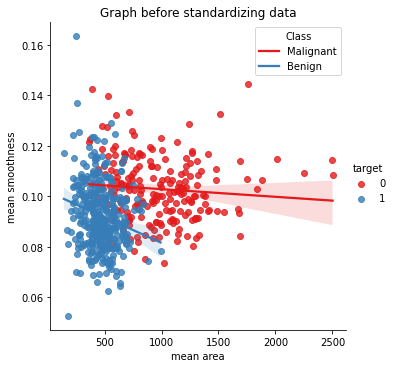

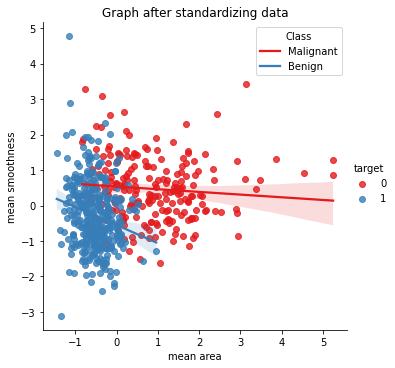

In [89]:
#standardising the data and plotting
plot_2=sns.lmplot(x="mean area", y="mean smoothness", data=df, hue="target", palette="Set1")
plt.legend(title='Class', loc='upper right', labels=['Malignant', 'Benign'])
plt.title("Graph before standardizing data")
plt.show(plot_2)

#copying mean area seperately
a=df.iloc[:,[3]]

#copying mean smothness seperately
b=df.iloc[:,[4]]

#calculating mean and standard deviation
mu_1,si_1=df['mean area'].mean(), df['mean area'].std()
mu_2,si_2=df['mean smoothness'].mean(), df['mean smoothness'].std()

a-=mu_1  #subtracting the mean from every entry
a/=si_1  #Dividing the standard deviation from every entry

b-=mu_2  #subtracting the mean from every entry
b/=si_2  #Dividing the standard deviation from every entry

#merging mean area and mean smothness
c=pd.concat([a,b,df['target']],axis=1, ignore_index=False)
plot_3=sns.lmplot(x="mean area", y="mean smoothness", data=c, hue="target", palette="Set1")
plt.legend(title='Class', loc='upper right', labels=['Malignant', 'Benign'])
plt.title("Graph after standardizing data")
plt.show(plot_3)

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




Answer 3. Based on graph, 
       Overfitted range is (0 to 5) because variance is high. 
       Underfitted range is (38 to 100) 

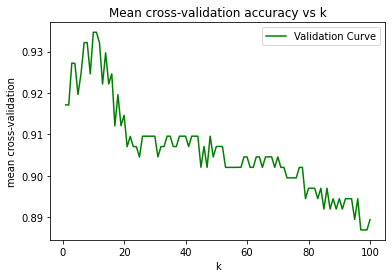

Highest cross-validation accuracy:  0.9346518987341772
Best K:  10


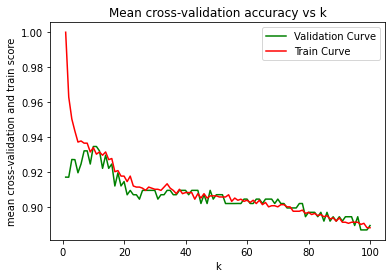

In [90]:
from sklearn import neighbors
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error
train_score_list=[]
test_score_list=[]
k=[]
error=[]
error_train=[]
for i in range (1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)

  #cross-validation
  score = cross_validate(knn, x_train, y_train, cv=5, return_train_score=True)
  #print('Mean Train Accuracy:',score['train_score'].mean())
  #print('Mean Validation (Test) Accuracy:', score['test_score'].mean())
  pred_i = knn.predict(x_test)
  mae = mean_absolute_error(y_test, pred_i)
  #mae_train = mean_absolute_error(y_test, pred_i)
  error.append(mae)
  #error_train.append(mae_train)
  train_score_list.append(score['train_score'].mean())
  test_score_list.append(score['test_score'].mean())
  k.append(i)

#creating dataframe for k, test_score, train_score
df_cross_validation = pd.DataFrame({'k': k, "test score": test_score_list, "train score": train_score_list})

#plotting
plt.plot(k, test_score_list, color='green', label = "Validation Curve")
plt.legend()
plt.xlabel('k') 
plt.ylabel('mean cross-validation')
plt.title("Mean cross-validation accuracy vs k")
plt.show()

#question 2
g=max(test_score_list)
print("Highest cross-validation accuracy: ",g)
print("Best K: ", test_score_list.index(max(test_score_list))+1)      #index value plus 1 is the value of k

#training and validation curve
plt.plot(k, test_score_list, color='green', label = "Validation Curve")
plt.plot(k, train_score_list, color='red', label = "Train Curve")
plt.legend()
plt.xlabel('k') 
plt.ylabel('mean cross-validation and train score')
plt.title("Mean cross-validation accuracy vs k")
plt.show()

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7). 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the on the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  







 

Answer: 3. The number of essential features for classification is the total number of features required by the model to predict the target. Based on importance 11 features are required. But based on iteration 2 features are required for classification.

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [91]:
def Feature_selector (X_train, y_train , tr=0.95):
  from sklearn import tree
  dt = tree.DecisionTreeClassifier()
  dt.fit(X_train,y_train)
  importance = dt.feature_importances_
  print("Importance: ", importance)
  fname=list(X.columns)
  importance_1=list(importance)
  fd=pd.DataFrame(data=X_train, columns= dataset.feature_names)
  mean_test_score=[]
  mean_final_k=[]
  feature_length=[]
  drp_feature=[]
  h=g                                         #initially h equals Full Feature cross-validation accuracy based on previous knn model
  q=1
  while len(fname)>1 and h>=(0.95*g):
    train_data=fd.values
    mean_test_score_list=[]
    mean_k=[]
    print("iteration:", q)
    print(fd.shape, fd.values.shape)

    for i in range (1,101):
      knn = neighbors.KNeighborsClassifier(n_neighbors=i)
      knn.fit(train_data, y_train)
      score = cross_validate(knn, train_data, y_train, cv=5, return_train_score=True)
      mean_test_score_list.append(score['test_score'].mean())
      mean_k.append(i)

    min_value=min(importance_1)
    min_index=importance_1.index(min_value)
    drp=fname[min_index]
    drp_feature.append(drp)
    fd=fd.drop([drp],axis=1)
    importance_1.pop(min_index)
    fname.pop(min_index)
    h=max(mean_test_score_list)
    mean_test_score.append(h)
    l=test_score_list.index(max(test_score_list))
    m=mean_k[l]
    mean_final_k.append(m)
    q=q+1
  return drp_feature, mean_test_score, mean_final_k

tr=0.75
feature, test_score, best_k=Feature_selector(x_train,y_train,tr)
print("The list of removed features: ", feature)
print("Mean cross-validation accuracy: ", test_score)
print("k value: ", best_k)
print("Highest cross-validation accuracy: ", max(test_score))

Importance:  [0.         0.01716396 0.01016418 0.         0.         0.
 0.00503366 0.         0.01815419 0.         0.         0.
 0.         0.04749283 0.         0.         0.         0.
 0.         0.00139161 0.01609121 0.01987347 0.         0.08615112
 0.         0.00990228 0.0261642  0.728114   0.0143033  0.        ]
iteration: 1
(398, 30) (398, 30)
iteration: 2
(398, 29) (398, 29)
iteration: 3
(398, 28) (398, 28)
iteration: 4
(398, 27) (398, 27)
iteration: 5
(398, 26) (398, 26)
iteration: 6
(398, 25) (398, 25)
iteration: 7
(398, 24) (398, 24)
iteration: 8
(398, 23) (398, 23)
iteration: 9
(398, 22) (398, 22)
iteration: 10
(398, 21) (398, 21)
iteration: 11
(398, 20) (398, 20)
iteration: 12
(398, 19) (398, 19)
iteration: 13
(398, 18) (398, 18)
iteration: 14
(398, 17) (398, 17)
iteration: 15
(398, 16) (398, 16)
iteration: 16
(398, 15) (398, 15)
iteration: 17
(398, 14) (398, 14)
iteration: 18
(398, 13) (398, 13)
iteration: 19
(398, 12) (398, 12)
iteration: 20
(398, 11) (398, 11)
iter

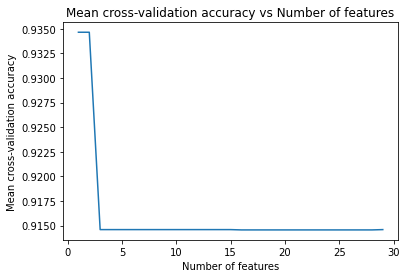

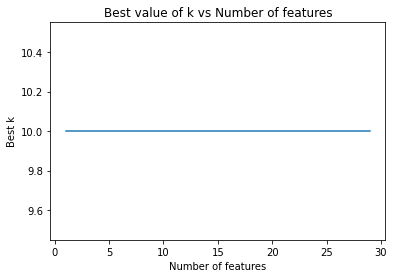

In [92]:
#mean cross-validation accuracy vs. number of features 
length_feature =[]
for i in range(1,len(feature)+1):
  length_feature.append(i)
plt.plot(length_feature, test_score)
plt.xlabel('Number of features') 
plt.ylabel('Mean cross-validation accuracy')
plt.title('Mean cross-validation accuracy vs Number of features')
plt.show()

#Plot the best value of k vs. the number of features
plt.plot(length_feature, best_k)
plt.xlabel('Number of features') 
plt.ylabel('Best k')
plt.title('Best value of k vs Number of features')
plt.show()


## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) 

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%. 
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)


Answer 3. Standardization helped the model by increasing the cross-validation accuracy and its performance. Standardization is centering the data to a mean of 0 and standard deviation of 1.Standardizing the data helps in reducing challenges related to poor data quality and makes the data look normally distributed. The higher cross validation accuracy occurs at k=10 at 2 features and worst fractal dimension and fractal dimension error.

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
#using standardscaler on training set
tr=0.95
scaler = StandardScaler().fit(x_train)
scaler.mean_
scaler.scale_
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
feature_test, test_score_standard, k_standard=Feature_selector(x_train_scaled,y_train,tr)
print("The list of removed features: ", feature_standard)
print("Mean cross-validation accuracy: ", test_score_standard)
print("k value: ", k_standard)
print("Highest cross-validation accuracy: ", max(test_score_standard))
print("Best K: ", test_score_list.index(max(test_score_list))+1)

Importance:  [0.         0.01716396 0.         0.01016418 0.         0.
 0.         0.         0.01815419 0.01609121 0.00503366 0.
 0.         0.04749283 0.01058659 0.         0.         0.
 0.         0.         0.         0.01067849 0.         0.08615112
 0.         0.         0.0261642  0.728114   0.02420558 0.        ]
iteration: 1
(398, 30) (398, 30)
iteration: 2
(398, 29) (398, 29)
iteration: 3
(398, 28) (398, 28)
iteration: 4
(398, 27) (398, 27)
iteration: 5
(398, 26) (398, 26)
iteration: 6
(398, 25) (398, 25)
iteration: 7
(398, 24) (398, 24)
iteration: 8
(398, 23) (398, 23)
iteration: 9
(398, 22) (398, 22)
iteration: 10
(398, 21) (398, 21)
iteration: 11
(398, 20) (398, 20)
iteration: 12
(398, 19) (398, 19)
iteration: 13
(398, 18) (398, 18)
iteration: 14
(398, 17) (398, 17)
iteration: 15
(398, 16) (398, 16)
iteration: 16
(398, 15) (398, 15)
iteration: 17
(398, 14) (398, 14)
iteration: 18
(398, 13) (398, 13)
iteration: 19
(398, 12) (398, 12)
iteration: 20
(398, 11) (398, 11)
iter

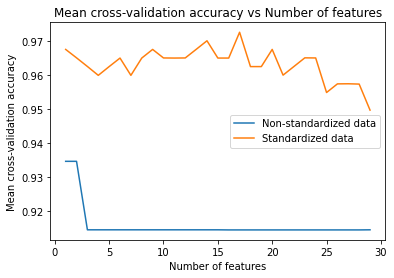

In [94]:
length_feature_standard =[]
for i in range(1, len(feature_standard)+1):
  length_feature_standard.append(i)
plt.plot(length_feature, test_score, label='Non-standardized data')
plt.plot(length_feature_standard, test_score_standard, label='Standardized data')
plt.legend()
plt.xlabel('Number of features') 
plt.ylabel('Mean cross-validation accuracy')
plt.title('Mean cross-validation accuracy vs Number of features')
plt.show()

## Part 5: Decision Tree Classifier [1.5 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features. 


In [95]:
from sklearn import tree
import numpy as np
from sklearn.model_selection import cross_val_score
mean_cv_score=[]
mean_test_score_decision=[]
for i in range (1,11):
  for j in range (2,13):
    model = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=2)
    xyz = cross_val_score(model, x_train_scaled, y_train, cv=5).mean()
    mean_cv_score.append(xyz)
print("Best Decision tree mean cross-validation: ",max(mean_cv_score))

for i in range (1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_scaled, y_train)
  score = cross_validate(knn, x_train_scaled, y_train, cv=5, return_train_score=True)
  mean_test_score_decision.append(score['test_score'].mean())
print("Best KNN mean cross-validation: ", max(mean_test_score_decision))


Best Decision tree mean cross-validation:  0.9296518987341773
Best KNN mean cross-validation:  0.9674367088607594


KNN model has the maximum cross-validation compared to the decision tree's cross-validation

## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

Answer: Feature selection model after standardizing the values is better. Accuracy is around 95%.

In [110]:
mod = Feature_selector(x_test, y_test)
acc= max(mod[1])
print("accuracy: ", round(acc*100,2))

Importance:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.01256614 0.00814033 0.         0.
 0.01213282 0.02094356 0.         0.         0.         0.
 0.         0.         0.80872391 0.         0.         0.
 0.02386171 0.         0.01675485 0.09687668 0.         0.        ]
iteration: 1
(171, 30) (171, 30)
iteration: 2
(171, 29) (171, 29)
iteration: 3
(171, 28) (171, 28)
iteration: 4
(171, 27) (171, 27)
iteration: 5
(171, 26) (171, 26)
iteration: 6
(171, 25) (171, 25)
iteration: 7
(171, 24) (171, 24)
iteration: 8
(171, 23) (171, 23)
iteration: 9
(171, 22) (171, 22)
iteration: 10
(171, 21) (171, 21)
iteration: 11
(171, 20) (171, 20)
iteration: 12
(171, 19) (171, 19)
iteration: 13
(171, 18) (171, 18)
iteration: 14
(171, 17) (171, 17)
iteration: 15
(171, 16) (171, 16)
iteration: 16
(171, 15) (171, 15)
iteration: 17
(171, 14) (171, 14)
iteration: 18
(171, 13) (171, 13)
iteration: 19
(171, 12) (171, 12)
iteration: 20
(171, 11) (171, 11)
iteration: 2

References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/